<a href="https://colab.research.google.com/github/JorgeICS/Primeos_Analisis_Geopandas/blob/main/cobertura_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  geopandas pandas matplotlib

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

Se cargan las agebs de México y se filtran solo las de Baja California

<Axes: >

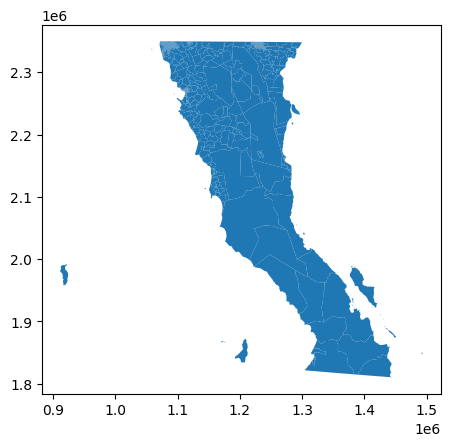

In [ ]:
agebs = gpd.read_file('/content/drive/MyDrive/MG_2020_Integrado/conjunto_de_datos/00a.shp')
agebs_bc = agebs[agebs['CVE_ENT']=='02']
agebs_bc.plot()

In [ ]:
agebs_bc.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,Ambito,geometry
479,0200102472200,02,001,0247,2200,Urbana,"POLYGON ((1106171.078 2273548.276, 1106181.991..."
480,0200101399918,02,001,0139,9918,Urbana,"POLYGON ((1115824.070 2251960.119, 1115876.388..."
481,020010001795A,02,001,0001,795A,Urbana,"POLYGON ((1115348.595 2267956.443, 1115347.288..."
482,0200100011490,02,001,0001,1490,Urbana,"POLYGON ((1110338.345 2273510.431, 1110427.922..."
483,0200102431819,02,001,0243,1819,Urbana,"POLYGON ((1141701.509 2206110.771, 1141638.155..."


In [ ]:
agebs_bc.crs

<Projected CRS: PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["MEXICO_ITRF_ ...>
Name: MEXICO_ITRF_2008_LCC
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: International Terrestrial Reference Frame 2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Se carga el mapa de Cobertura

            estado      Periodo          Area  \
0  Baja California  1erTrim2024  1.327252e+10   

                                            geometry  
0  MULTIPOLYGON (((1077732.028 2319926.681, 10777...  


<Axes: >

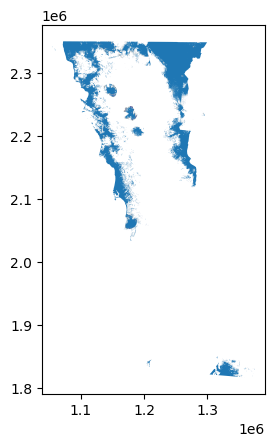

In [ ]:
cobertura_bc = gpd.read_file('/content/drive/MyDrive/Cobertura_Baja_California/COBERTURA/Baja Californiacoberturaunida124.shp')
print(cobertura_bc.head())
cobertura_bc.plot()

In [ ]:
cobertura_bc.crs

<Projected CRS: EPSG:6372>
Name: Mexico ITRF2008 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Se comparan los sistemas de referencia de ambos dataframes y se igualan

In [ ]:
agebs_bc = agebs_bc.set_crs(epsg=6372, allow_override=True)

Se hace la operacion de interseccion entre la el Df de AGEBS y el Df de Cobertura

In [ ]:
agebs_con_cobertura = agebs_bc.overlay(cobertura_bc, how='intersection', keep_geom_type=False)


Esto nos agrupa las entidades con cobertura

In [ ]:
agebs_con_cobertura.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,Ambito,estado,Periodo,Area,geometry
0,0200102472200,02,001,0247,2200,Urbana,Baja California,1erTrim2024,1.327252e+10,"POLYGON ((1106181.991 2273545.301, 1106202.373..."
1,0200101399918,02,001,0139,9918,Urbana,Baja California,1erTrim2024,1.327252e+10,"POLYGON ((1115876.388 2252044.571, 1115939.958..."
2,020010001795A,02,001,0001,795A,Urbana,Baja California,1erTrim2024,1.327252e+10,"POLYGON ((1115347.288 2267907.628, 1115343.720..."
3,0200100011490,02,001,0001,1490,Urbana,Baja California,1erTrim2024,1.327252e+10,"POLYGON ((1110427.922 2273453.920, 1110419.600..."
4,0200102431819,02,001,0243,1819,Urbana,Baja California,1erTrim2024,1.327252e+10,"POLYGON ((1141638.155 2205987.606, 1141595.689..."


In [ ]:
agebs_con_cobertura

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,Ambito,estado,Periodo,Area,geometry
0,0200102472200,02,001,0247,2200,Urbana,Baja California,1erTrim2024,1.327252e+10,"POLYGON ((1106181.991 2273545.301, 1106202.373..."
1,0200101399918,02,001,0139,9918,Urbana,Baja California,1erTrim2024,1.327252e+10,"POLYGON ((1115876.388 2252044.571, 1115939.958..."
2,020010001795A,02,001,0001,795A,Urbana,Baja California,1erTrim2024,1.327252e+10,"POLYGON ((1115347.288 2267907.628, 1115343.720..."
3,0200100011490,02,001,0001,1490,Urbana,Baja California,1erTrim2024,1.327252e+10,"POLYGON ((1110427.922 2273453.920, 1110419.600..."
4,0200102431819,02,001,0243,1819,Urbana,Baja California,1erTrim2024,1.327252e+10,"POLYGON ((1141638.155 2205987.606, 1141595.689..."
...,...,...,...,...,...,...,...,...,...,...
1944,020060982,02,006,0000,0982,Rural,Baja California,1erTrim2024,1.327252e+10,"MULTIPOLYGON (((1177852.805 2114230.607, 11778..."
1945,020061020,02,006,0000,1020,Rural,Baja California,1erTrim2024,1.327252e+10,"MULTIPOLYGON (((1160784.467 2106392.172, 11607..."
1946,020061035,02,006,0000,1035,Rural,Baja California,1erTrim2024,1.327252e+10,"MULTIPOLYGON (((1182316.893 2099951.953, 11823..."
1947,020061054,02,006,0000,1054,Rural,Baja California,1erTrim2024,1.327252e+10,"MULTIPOLYGON (((1175823.743 2092033.027, 11758..."


Con la operacion de Diferencia nos muestra las entidades sin cobertura

In [ ]:
agebs_sin_cobertura = agebs_bc.overlay(cobertura_bc, how='difference', keep_geom_type=False)

In [ ]:
agebs_sin_cobertura.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,Ambito,geometry
0,0200102477466,02,001,0247,7466,Urbana,"MULTIPOLYGON (((1104179.492 2274383.543, 11041..."
1,0200100017979,02,001,0001,7979,Urbana,"MULTIPOLYGON (((1112097.888 2266510.265, 11121..."
2,0200102477324,02,001,0247,7324,Urbana,"MULTIPOLYGON (((1105632.449 2275006.399, 11056..."
3,0200101397536,02,001,0139,7536,Urbana,"POLYGON ((1115227.036 2254396.973, 1115224.671..."
4,0200100010628,02,001,0001,0628,Urbana,"MULTIPOLYGON (((1109911.973 2269639.790, 11099..."


Marcamos si tiene corbertura o no

In [ ]:
agebs_con_cobertura['cobertura'] = True

In [ ]:
agebs_sin_cobertura['cobertura'] = False

Combinamos ambos Dataframes

In [ ]:
# unir ambos dataframes en uno solo

agebs_final = pd.concat([agebs_con_cobertura, agebs_sin_cobertura],ignore_index=True)
agebs_final.head()


,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,Ambito,estado,Periodo,Area,geometry,cobertura
0,0200102472200,02,001,0247,2200,Urbana,Baja California,1erTrim2024,1.327252e+10,"POLYGON ((1106181.991 2273545.301, 1106202.373...",True
1,0200101399918,02,001,0139,9918,Urbana,Baja California,1erTrim2024,1.327252e+10,"POLYGON ((1115876.388 2252044.571, 1115939.958...",True
2,020010001795A,02,001,0001,795A,Urbana,Baja California,1erTrim2024,1.327252e+10,"POLYGON ((1115347.288 2267907.628, 1115343.720...",True
3,0200100011490,02,001,0001,1490,Urbana,Baja California,1erTrim2024,1.327252e+10,"POLYGON ((1110427.922 2273453.920, 1110419.600...",True
4,0200102431819,02,001,0243,1819,Urbana,Baja California,1erTrim2024,1.327252e+10,"POLYGON ((1141638.155 2205987.606, 1141595.689...",True


Eliminamos duplicados

In [ ]:
agebs_final.loc[agebs_final.duplicated(['CVE_AGEB']), 'cobertura'] = 'parcial'

In [ ]:
filtro = agebs_final['cobertura'] == 'parcial'

In [ ]:
agebs_final = agebs_final[~filtro]

In [ ]:
agebs_final = agebs_final[['CVEGEO','CVE_MUN','CVE_LOC','CVE_AGEB','Ambito','Area','geometry','cobertura']]
agebs_final

,CVEGEO,CVE_MUN,CVE_LOC,CVE_AGEB,Ambito,Area,geometry,cobertura
0,0200102472200,001,0247,2200,Urbana,1.327252e+10,"POLYGON ((1106181.991 2273545.301, 1106202.373...",True
1,0200101399918,001,0139,9918,Urbana,1.327252e+10,"POLYGON ((1115876.388 2252044.571, 1115939.958...",True
2,020010001795A,001,0001,795A,Urbana,1.327252e+10,"POLYGON ((1115347.288 2267907.628, 1115343.720...",True
3,0200100011490,001,0001,1490,Urbana,1.327252e+10,"POLYGON ((1110427.922 2273453.920, 1110419.600...",True
4,0200102431819,001,0243,1819,Urbana,1.327252e+10,"POLYGON ((1141638.155 2205987.606, 1141595.689...",True
...,...,...,...,...,...,...,...,...
2298,020069492,006,0000,9492,Rural,NaN,"POLYGON ((1436927.023 1888302.585, 1436914.321...",False
2299,020069505,006,0000,9505,Rural,NaN,"POLYGON ((1303089.052 1896091.986, 1303091.414...",False
2300,020069172,006,0000,9172,Rural,NaN,"POLYGON ((1425237.082 1912947.062, 1425247.290...",False
2301,020069191,006,0000,9191,Rural,NaN,"POLYGON ((1426339.274 1910250.059, 1426350.260...",False


Recuento total de cobertura

In [ ]:
agebs_final.groupby('cobertura').agg({
    'CVE_AGEB': 'count'
    })

,CVE_AGEB
cobertura,
False,81
True,1949


Recuento por ambito Rural o Urbano

Rurales CON cobertura (173)

In [ ]:
#  mostrar datos con un filtro de dos condiciones

agebs_final[ (agebs_final['Ambito'] == 'Rural') & (agebs_final['cobertura'] == True) ]


,CVEGEO,CVE_MUN,CVE_LOC,CVE_AGEB,Ambito,Area,geometry,cobertura
1776,020016260,001,0000,6260,Rural,1.327252e+10,"MULTIPOLYGON (((1144857.213 2294314.533, 11446...",True
1777,020016434,001,0000,6434,Rural,1.327252e+10,"MULTIPOLYGON (((1142370.378 2266393.128, 11423...",True
1778,020016650,001,0000,6650,Rural,1.327252e+10,"MULTIPOLYGON (((1199681.108 2212145.928, 11997...",True
1779,020016383,001,0000,6383,Rural,1.327252e+10,"MULTIPOLYGON (((1153800.800 2273007.024, 11538...",True
1780,020016400,001,0000,6400,Rural,1.327252e+10,"MULTIPOLYGON (((1102353.916 2277527.328, 11023...",True
...,...,...,...,...,...,...,...,...
1944,020060982,006,0000,0982,Rural,1.327252e+10,"MULTIPOLYGON (((1177852.805 2114230.607, 11778...",True
1945,020061020,006,0000,1020,Rural,1.327252e+10,"MULTIPOLYGON (((1160784.467 2106392.172, 11607...",True
1946,020061035,006,0000,1035,Rural,1.327252e+10,"MULTIPOLYGON (((1182316.893 2099951.953, 11823...",True
1947,020061054,006,0000,1054,Rural,1.327252e+10,"MULTIPOLYGON (((1175823.743 2092033.027, 11758...",True


Urbanas CON cobertura (1776)

In [ ]:
agebs_final[ (agebs_final['Ambito'] == 'Urbana') & (agebs_final['cobertura'] == True) ]

,CVEGEO,CVE_MUN,CVE_LOC,CVE_AGEB,Ambito,Area,geometry,cobertura
0,0200102472200,001,0247,2200,Urbana,1.327252e+10,"POLYGON ((1106181.991 2273545.301, 1106202.373...",True
1,0200101399918,001,0139,9918,Urbana,1.327252e+10,"POLYGON ((1115876.388 2252044.571, 1115939.958...",True
2,020010001795A,001,0001,795A,Urbana,1.327252e+10,"POLYGON ((1115347.288 2267907.628, 1115343.720...",True
3,0200100011490,001,0001,1490,Urbana,1.327252e+10,"POLYGON ((1110427.922 2273453.920, 1110419.600...",True
4,0200102431819,001,0243,1819,Urbana,1.327252e+10,"POLYGON ((1141638.155 2205987.606, 1141595.689...",True
...,...,...,...,...,...,...,...,...
1771,020060040022A,006,0040,022A,Urbana,1.327252e+10,"POLYGON ((1152434.059 2151104.233, 1152470.684...",True
1772,0200608630874,006,0863,0874,Urbana,1.327252e+10,"POLYGON ((1158765.050 2139193.705, 1158769.405...",True
1773,0200600820268,006,0082,0268,Urbana,1.327252e+10,"POLYGON ((1157932.691 2135385.228, 1157893.400...",True
1774,0200608630889,006,0863,0889,Urbana,1.327252e+10,"POLYGON ((1158915.803 2137229.920, 1158918.349...",True


Rurales SIN cobertura (81)

In [ ]:
agebs_final[ (agebs_final['Ambito'] == 'Rural') & (agebs_final['cobertura'] == False) ]

,CVEGEO,CVE_MUN,CVE_LOC,CVE_AGEB,Ambito,Area,geometry,cobertura
2059,020017095,001,0000,7095,Rural,NaN,"POLYGON ((1267198.704 2053317.397, 1262218.510...",False
2060,020017112,001,0000,7112,Rural,NaN,"POLYGON ((1347489.496 1977203.061, 1344949.233...",False
2062,020016627,001,0000,6627,Rural,NaN,"POLYGON ((1216957.719 2216803.340, 1216858.473...",False
2073,020016720,001,0000,6720,Rural,NaN,"POLYGON ((1217286.095 2203330.427, 1217286.897...",False
2076,020016398,001,0000,6398,Rural,NaN,"POLYGON ((1196866.189 2252678.251, 1189764.708...",False
...,...,...,...,...,...,...,...,...
2298,020069492,006,0000,9492,Rural,NaN,"POLYGON ((1436927.023 1888302.585, 1436914.321...",False
2299,020069505,006,0000,9505,Rural,NaN,"POLYGON ((1303089.052 1896091.986, 1303091.414...",False
2300,020069172,006,0000,9172,Rural,NaN,"POLYGON ((1425237.082 1912947.062, 1425247.290...",False
2301,020069191,006,0000,9191,Rural,NaN,"POLYGON ((1426339.274 1910250.059, 1426350.260...",False


Urbanas SIN Cobertura (Ninguna)

In [ ]:
agebs_final[ (agebs_final['Ambito'] == 'Urbana') & (agebs_final['cobertura'] == False) ]

,CVEGEO,CVE_MUN,CVE_LOC,CVE_AGEB,Ambito,Area,geometry,cobertura


In [ ]:
agebs_final[agebs_final.cobertura == True]

,CVEGEO,CVE_MUN,CVE_LOC,CVE_AGEB,Ambito,Area,geometry,cobertura
0,0200102472200,001,0247,2200,Urbana,1.327252e+10,"POLYGON ((1106181.991 2273545.301, 1106202.373...",True
1,0200101399918,001,0139,9918,Urbana,1.327252e+10,"POLYGON ((1115876.388 2252044.571, 1115939.958...",True
2,020010001795A,001,0001,795A,Urbana,1.327252e+10,"POLYGON ((1115347.288 2267907.628, 1115343.720...",True
3,0200100011490,001,0001,1490,Urbana,1.327252e+10,"POLYGON ((1110427.922 2273453.920, 1110419.600...",True
4,0200102431819,001,0243,1819,Urbana,1.327252e+10,"POLYGON ((1141638.155 2205987.606, 1141595.689...",True
...,...,...,...,...,...,...,...,...
1944,020060982,006,0000,0982,Rural,1.327252e+10,"MULTIPOLYGON (((1177852.805 2114230.607, 11778...",True
1945,020061020,006,0000,1020,Rural,1.327252e+10,"MULTIPOLYGON (((1160784.467 2106392.172, 11607...",True
1946,020061035,006,0000,1035,Rural,1.327252e+10,"MULTIPOLYGON (((1182316.893 2099951.953, 11823...",True
1947,020061054,006,0000,1054,Rural,1.327252e+10,"MULTIPOLYGON (((1175823.743 2092033.027, 11758...",True
